# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

In [3]:
n = 100
x = np.arange(n)

In [5]:
rs = check_random_state(0)
print(rs)

RandomState(MT19937)


In [7]:
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

In [8]:
ir = IsotonicRegression()   # Isotonic Regression
y_ = ir.fit_transform(x, y)

In [9]:
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
yy_ = lr.predict(x[:, np.newaxis]) # Predict using linear regression model above

In [14]:
# Plot result
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

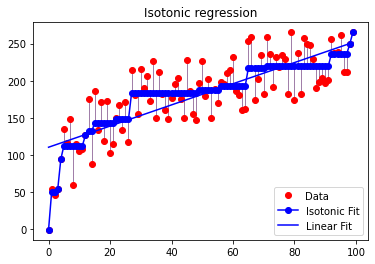

In [20]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'b.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()
